In [28]:
import sage_data_client
import matplotlib.pyplot as plt
import pandas as pd
from metpy.calc import dewpoint_from_relative_humidity, wet_bulb_temperature
from metpy.units import units
from PIL import Image
import numpy as np
import datetime
import xarray as xr
import glob

from matplotlib.dates import DateFormatter

In [67]:
my_glob = glob.glob('/Users/scollis/data/wxt/CMS_wxt536_NEIU_a1_2023*')
xr_wxt = xr.open_mfdataset(my_glob)

In [68]:
xr_wxt

<xarray.Dataset>
Dimensions:        (time: 92021)
Coordinates:
  * time           (time) datetime64[ns] 2023-05-21 ... 2023-06-02T16:08:40
Data variables:
    temperatures   (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    humidity       (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    pressure       (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    rainfall       (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    dewpoint       (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    wetbulb        (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    wind_dir_10s   (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    wind_mean_10s  (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    wind_max_10s   (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>

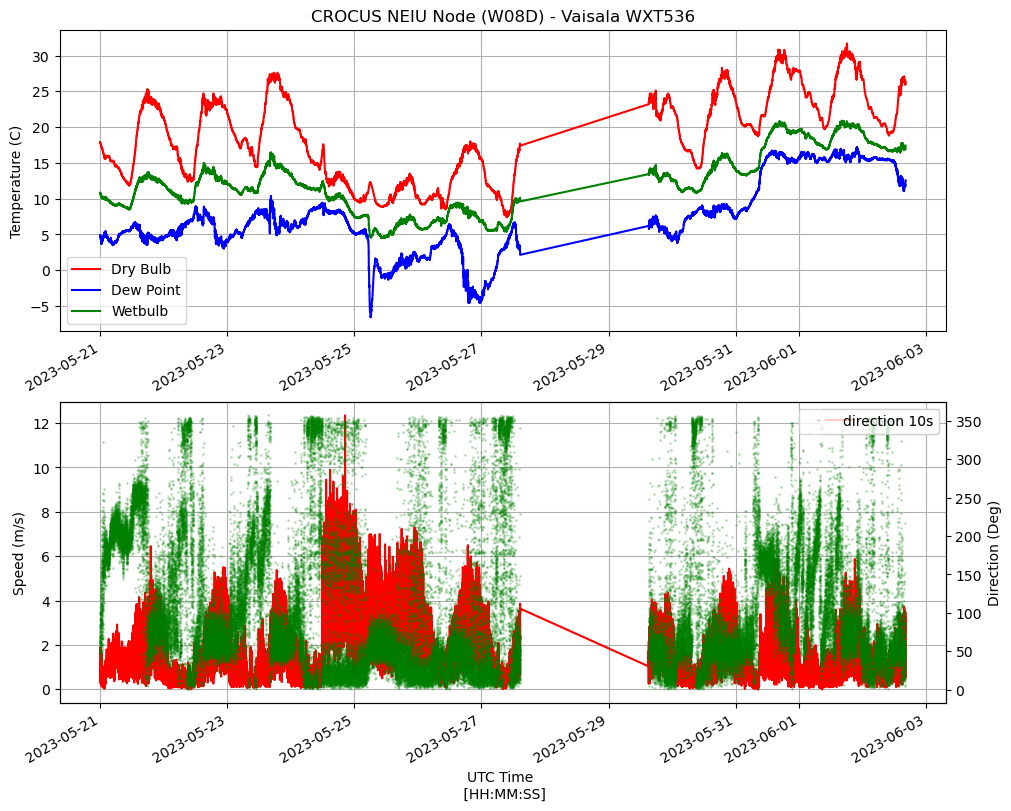

In [72]:
fig, axs = plt.subplots( ncols=1, nrows=2, figsize=[10,8], constrained_layout=True)
xr_wxt.temperatures.plot(ax=axs[0], color='r', label='Dry Bulb')
xr_wxt.dewpoint.plot(color='b', label='Dew Point',ax=axs[0])
xr_wxt.wetbulb.plot(color='g', label='Wetbulb',ax=axs[0])

xr_wxt.wind_mean_10s.plot(ax=axs[1], color='r', label='mean 10s')
ytwin = plt.twinx()

xr_wxt.wind_dir_10s.plot(ax=ytwin, color='g', label='direction 10s', marker='.', linestyle='none', 
                         markersize=2, alpha = 0.2)

axs[0].set_title('CROCUS NEIU Node (W08D) - Vaisala WXT536')
axs[0].set_xlabel('')
axs[0].set_ylabel('Temperature (C)')


axs[1].set_xlabel('UTC Time \n [HH:MM:SS]')
axs[1].set_ylabel('Speed (m/s)')


axs[0].legend()
axs[0].grid(True)

axs[1].legend()
axs[1].grid(True)

ytwin.set_ylabel('Direction (Deg)')
ytwin.legend()


AttributeError: Line2D.set() got an unexpected keyword argument 'xlabel'

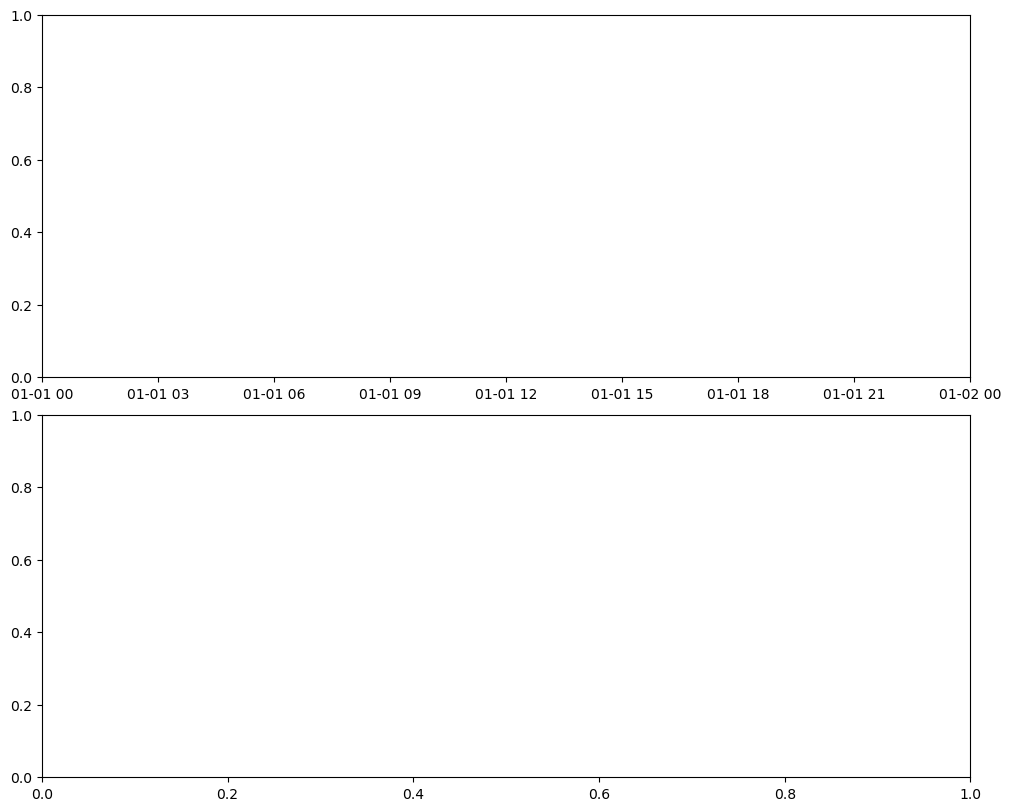

In [40]:
fig, axs = plt.subplots( ncols=1, nrows=2, figsize=[10,8], constrained_layout=True)
xr_wxt.temperatures.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS NEIU Node (W08D) - Vaisala WXT536',
                                          ax=axs[0], color='r', label='Dry Bulb',
                                          )


# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
xr_wxt.dewpoint.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS NEIU Node (W08D) - Vaisala WXT536',
                                           color='b', label='Dew Point',
                                          ax=axs[0])


xr_wxt.wetbulb.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS NEIU Node (W08D) - Vaisala WXT536',
                                          color='g', label='Wet Bulb',
                                          ax=axs[0])

axs[0].legend()
axs[0].grid(True)

xr_wxt.wind_mean_10s.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Wind speed m/s',
                                          title='',
                                          ax=axs[1], color='r', label='mean 60s'
                                          )


# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
xr_wxt.wind_max_10s.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Wind speed \n [m/s]',
                                          title='',
                                          ax=axs[1], color='b', label='max gust 60s'
                                          )
axs[1].legend()
axs[1].grid(True)

ytwin = plt.twinx()

xr_wxt.wind_dir_10s.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Wind direction \n [deg]',
                                          title='',
                                          ax=ytwin, color='g', label='direction 60s',
                                          marker='.', linestyle='none')

ytwin.legend(loc=2)

im = Image.open('Argonnelablogo.PNG')

im.thumbnail([im.size[0]/12, im.size[1]/12])
height = im.size[1]
width = im.size[0]
fig.figimage(im, 800  , 0)

im2 = Image.open('cr.png')

im2.thumbnail([im2.size[0]/4, im2.size[1]/4])
height = im2.size[1]
width = im2.size[0]
fig.figimage(im2, 200  , -20, zorder=-1)
#axs.xaxis.set_major_formatter(date_form)
